<a href="https://colab.research.google.com/github/fjgr/IA_BigData/blob/main/%20%20%20%20SNS/Act_3_2/SNS_Act_3_2_Comparativa_clasificadores_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comparativa de Modelos Naive Bayes en el Dataset Iris


Comparativa de Modelos Naive Bayes en el Dataset Iris:

Modelo: GaussianNB - Precisión: 0.98
Modelo: MultiNomialNB - Precisión: 0.91
Modelo: BernouilliNB - Precisión: 0.38
Modelo: ComplementNB - Precisión: 0.71
Modelo: CategoricalNB - Precisión: 0.96


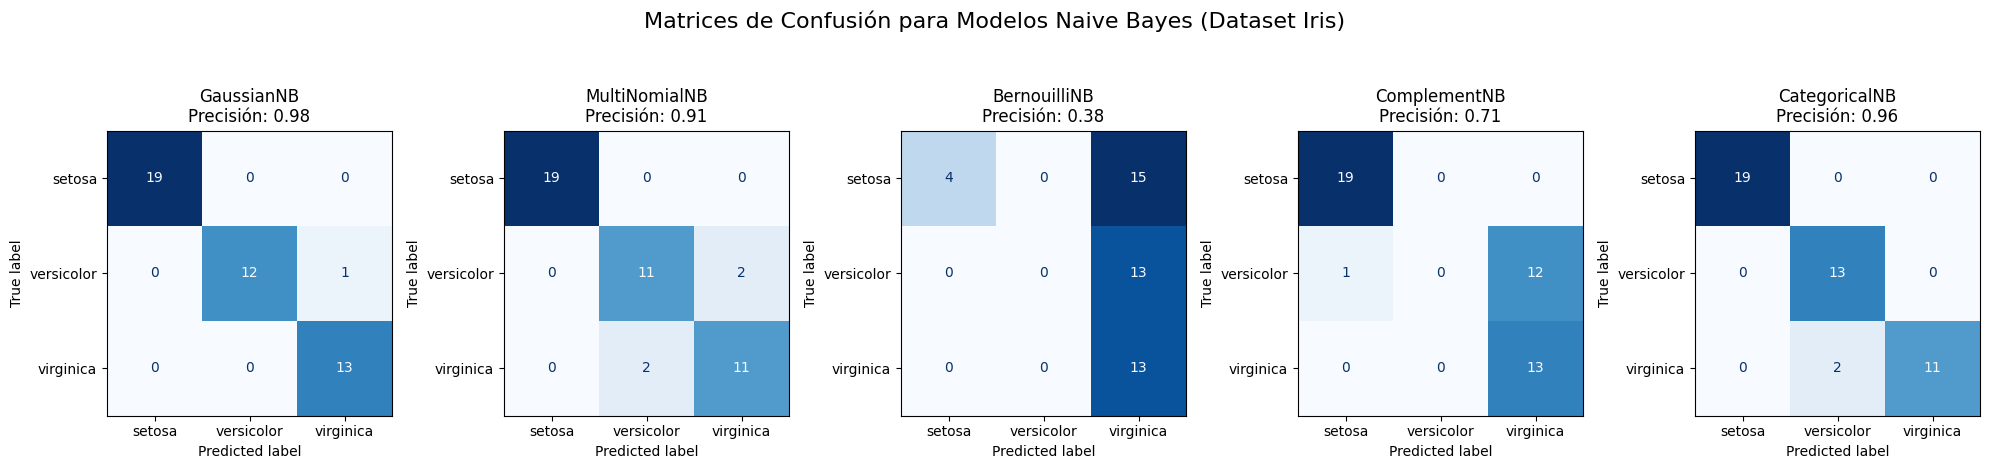

In [ ]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

# Cargar el dataset Iris
# Contiene datos sobre tres clases de flores (Setosa, Versicolor, Virginica)
# Cada flor tiene 4 características: longitud y ancho del sépalo y pétalo
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el dataset en datos de entrenamiento (70%) y prueba (30%)
# Esto asegura que los modelos se evalúen en datos que no han visto durante el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos para modelos sensibles a las escalas (MultinomialNB, BernoulliNB, ComplementNB)
# MinMaxScaler transforma los datos para que estén en el rango [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de nombres de los modelos Naive Bayes y sus respectivas implementaciones
names = ["GaussianNB", "MultiNomialNB", "BernouilliNB", "ComplementNB", "CategoricalNB"]
classifiers = [
    GaussianNB(),  # Para datos continuos con una distribución normal
    MultinomialNB(),  # Para datos representados como frecuencias positivas
    BernoulliNB(),  # Para datos binarios
    ComplementNB(),  # Variante de MultinomialNB más robusta a desequilibrios de clases
    CategoricalNB(min_categories=3)  # Para datos categóricos (mínimo 3 categorías)
]

# Configurar los subplots para mostrar las matrices de confusión en una sola línea
fig, axes = plt.subplots(1, len(classifiers), figsize=(20, 5))
fig.suptitle("Matrices de Confusión para Modelos Naive Bayes (Dataset Iris)", fontsize=16)

# Evaluar cada modelo y graficar sus resultados
print("Comparativa de Modelos Naive Bayes en el Dataset Iris:\n")
for idx, (name, clf) in enumerate(zip(names, classifiers)):
    # Ajustar el modelo a los datos escalados o normales dependiendo del modelo
    if name in ["MultiNomialNB", "BernouilliNB", "ComplementNB"]:
        # Usar los datos escalados para estos modelos
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    elif name == "CategoricalNB":
        # CategoricalNB requiere datos categóricos, así que convertimos las características a enteros
        X_train_cat = X_train.astype(int)
        X_test_cat = X_test.astype(int)
        clf.fit(X_train_cat, y_train)
        y_pred = clf.predict(X_test_cat)
    else:
        # GaussianNB puede manejar directamente datos continuos sin escalado
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    # Calcular la precisión del modelo en el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Modelo: {name} - Precisión: {accuracy:.2f}")

    # Crear la matriz de confusión comparando las predicciones con las etiquetas reales
    cm = confusion_matrix(y_test, y_pred)

    # Graficar la matriz de confusión en el subplot correspondiente
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    display.plot(ax=axes[idx], cmap=plt.cm.Blues, colorbar=False)  # Sin barra de color para ahorrar espacio
    axes[idx].set_title(f"{name}\nPrecisión: {accuracy:.2f}")  # Título con el modelo y su precisión

# Ajustar el diseño de los subplots para evitar solapamientos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar los gráficos
plt.show()

## Comparativa de Modelos Naive Bayes en el Dataset Penguin

Comparativa de Modelos Naive Bayes en el Dataset Penguins:

Modelo: GaussianNB - Precisión: 0.98
Modelo: MultiNomialNB - Precisión: 0.82
Modelo: BernouilliNB - Precisión: 0.49
Modelo: ComplementNB - Precisión: 0.84
Modelo: CategoricalNB - Precisión: 0.89


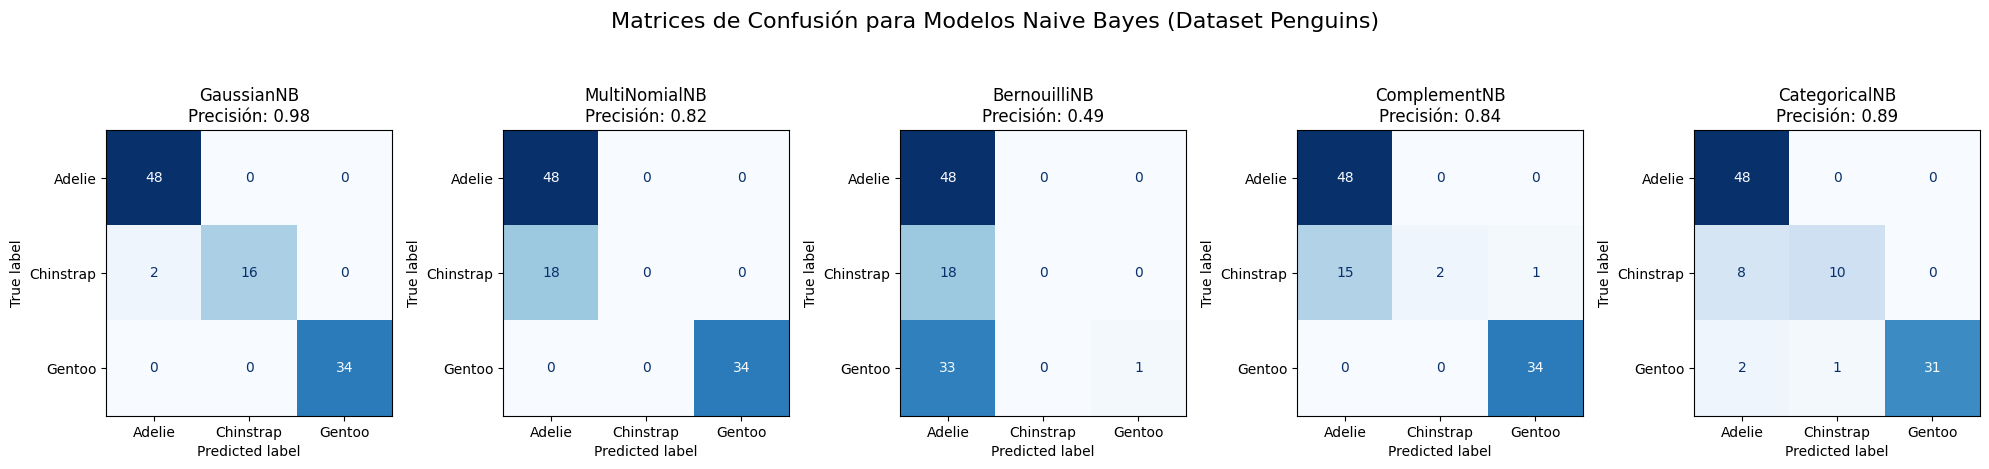

In [ ]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

# Cargar el dataset Penguins desde seaborn
# Contiene información sobre tres especies de pingüinos con características como:
# longitud del pico, profundidad del pico, longitud de la aleta y peso corporal
penguins = sns.load_dataset('penguins')

# Eliminar filas con valores nulos
# Esto simplifica el proceso y asegura que no haya errores relacionados con datos faltantes
penguins = penguins.dropna()

# Seleccionar las características numéricas y las etiquetas (especies)
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# Codificar las etiquetas (especies) de texto en valores numéricos
# Ejemplo: 'Adelie' -> 0, 'Chinstrap' -> 1, 'Gentoo' -> 2
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%)
# Esto asegura que los modelos se entrenen y evalúen en datos diferentes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características numéricas para modelos que lo requieren
# Usamos MinMaxScaler para transformar los valores en el rango [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de nombres de los modelos Naive Bayes y sus implementaciones
# Cada modelo está diseñado para diferentes tipos de datos
names = ["GaussianNB", "MultiNomialNB", "BernouilliNB", "ComplementNB", "CategoricalNB"]
classifiers = [
    GaussianNB(),  # Para datos continuos con distribución normal
    MultinomialNB(),  # Para datos representados como frecuencias positivas
    BernoulliNB(),  # Para datos binarios (0/1)
    ComplementNB(),  # Variante de MultinomialNB, robusta a desequilibrios de clases
    CategoricalNB(min_categories=3)  # Para datos categóricos (mínimo 3 categorías)
]

# Configurar subplots para mostrar las matrices de confusión en una sola fila
fig, axes = plt.subplots(1, len(classifiers), figsize=(20, 5))
fig.suptitle("Matrices de Confusión para Modelos Naive Bayes (Dataset Penguins)", fontsize=16)

# Evaluar cada modelo y graficar los resultados
print("Comparativa de Modelos Naive Bayes en el Dataset Penguins:\n")
for idx, (name, clf) in enumerate(zip(names, classifiers)):
    # Ajustar el modelo dependiendo de los requisitos de entrada
    if name in ["MultiNomialNB", "BernouilliNB", "ComplementNB"]:
        # Escalar los datos para estos modelos
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    elif name == "CategoricalNB":
        # Para CategoricalNB, convertimos las características a enteros
        X_train_cat = X_train.astype(int)
        X_test_cat = X_test.astype(int)
        clf.fit(X_train_cat, y_train)
        y_pred = clf.predict(X_test_cat)
    else:
        # GaussianNB puede trabajar con datos continuos sin escalar
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    # Calcular la precisión del modelo en el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Modelo: {name} - Precisión: {accuracy:.2f}")

    # Crear la matriz de confusión comparando las predicciones con las etiquetas reales
    cm = confusion_matrix(y_test, y_pred)

    # Graficar la matriz de confusión en el subplot correspondiente
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    display.plot(ax=axes[idx], cmap=plt.cm.Blues, colorbar=False)  # Sin barra de color para ahorrar espacio
    axes[idx].set_title(f"{name}\nPrecisión: {accuracy:.2f}")  # Título con el nombre del modelo y su precisión

# Ajustar el diseño de los subplots para evitar solapamientos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar los gráficos con las matrices de confusión
plt.show()
